In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, let us have a look at the distributions of some major fields.
Here are some histograms(or density plots) below, which I think were important.
1. ``home_score`` and ``away_score`` from the ``matches`` table.
2. ``penalty`` and ``own_goal`` from the ``num_cols`` table.
3. Kernel Density plot of sum of ``home_goal`` and sum of ``penalty`` grouped by ``['date', 'home_team', 'away_team']`` ( this combination means one match)
4. Kernel Density plot of sum of ``away_goal`` and sum of ``own_goal`` grouped by ``['date', 'home_team', 'away_team']``

In [152]:
#this cell is for occasional intermediate loading purposes and is not intended for final submission

all_goals = pd.read_csv('created/all_goals.csv')
goals = pd.read_csv('created/goals.csv')
matches = pd.read_csv('created/matches.csv')
penalties = pd.read_csv('created/penalties.csv')
minute_v_goal = pd.read_csv('created/goal_grouped_by_minute.csv')

grouped_by_players = pd.read_csv('created/grouped_by_players.csv')
num_cols = pd.read_csv("created/num_cols.csv")

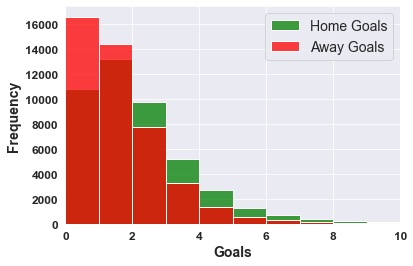

In [153]:
#1. ``home_score`` and ``away_score`` from the ``matches`` table.

ax3 = sns.histplot(data=matches, x='home_score', color='g', label='Home Goals', binwidth=1)
sns.histplot(data=matches, x='away_score', color='r', label='Away Goals', binwidth=1)
plt.ylabel('Frequency', fontsize=14, fontweight="bold")
plt.xlabel('Goals', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlim(0, 10)
plt.legend(fontsize=14)
plt.savefig('figures/score_histo.jpg')

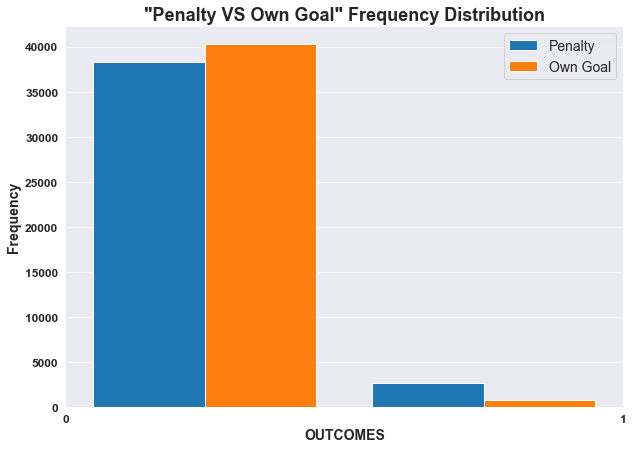

In [154]:
#2. ``penalty`` and ``own_goal`` from the ``num_cols`` table.

num_cols = pd.read_csv("created/num_cols.csv")
fig = plt.figure(figsize=(10,7))
plt.hist([num_cols['penalty'], num_cols['own_goal']], bins=2, label=['Penalty', 'Own Goal'])
plt.xticks([0,1], fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

plt.xlabel("OUTCOMES", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title('"Penalty VS Own Goal" Frequency Distribution', fontsize=18, fontweight="bold")
plt.legend(fontsize=14)
plt.show()

plt.savefig('figures/penalty_vs_own_goal.jpg')

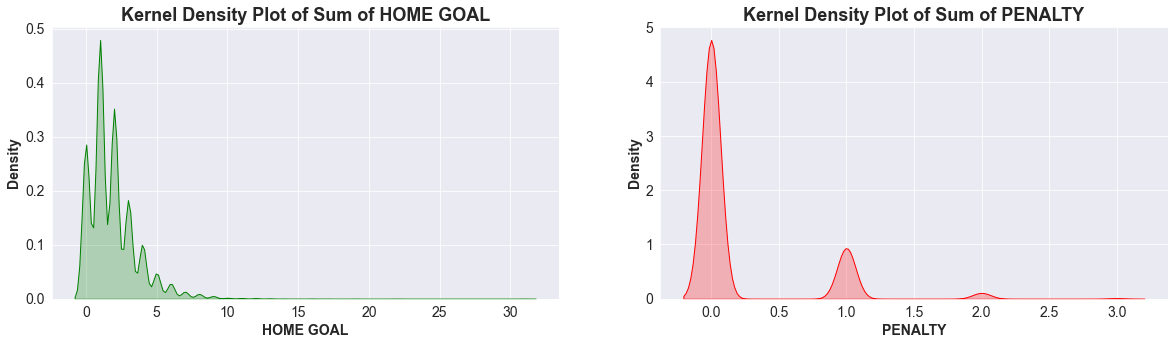

In [155]:
#3. Kernel Density plot of sum of ``home_goal`` and sum of ``penalty`` grouped by ``['date', 'home_team', 'away_team']`` ( this combination means one match)

all_goals_groupby = all_goals.groupby(["date", "home_team", "away_team"]).sum()[["home_goal", "penalty"]].reset_index()

fig, kdp_list = plt.subplots(ncols=2, figsize=(20,5))
sns.kdeplot(data=all_goals_groupby, x="home_goal", shade=True, ax=kdp_list[0], color="green")
kdp_list[0].set_xlabel("HOME GOAL", fontsize=14, fontweight="bold")
kdp_list[0].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[0].set_title("Kernel Density Plot of Sum of HOME GOAL", fontsize=18, fontweight="bold")
kdp_list[0].tick_params(axis="x", labelsize=14)
kdp_list[0].tick_params(axis="y", labelsize=14)


sns.kdeplot(data=all_goals_groupby, x="penalty", shade=True, ax=kdp_list[1], color="red")
kdp_list[1].set_xlabel("PENALTY", fontsize=14, fontweight="bold")
kdp_list[1].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[1].set_title("Kernel Density Plot of Sum of PENALTY", fontsize=18, fontweight="bold")
kdp_list[1].tick_params(axis="x", labelsize=14)
kdp_list[1].tick_params(axis="y", labelsize=14)

plt.savefig('figures/kdp_home_goal_penalty.jpg')

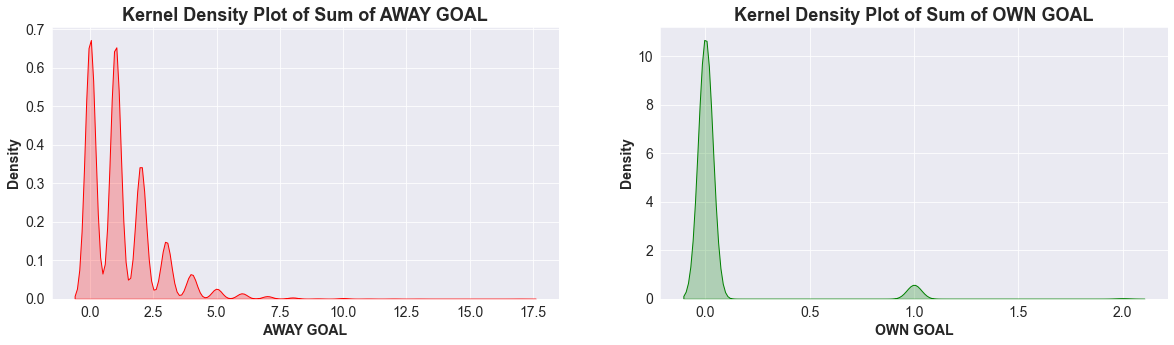

In [156]:
#4. Kernel Density plot of sum of ``away_goal`` and sum of ``own_goal`` grouped by ``['date', 'home_team', 'away_team']``

all_goals_groupby = all_goals.groupby(["date", "home_team", "away_team"]).sum()[["away_goal", "own_goal"]].reset_index()

fig, kdp_list = plt.subplots(ncols=2, figsize=(20,5))
sns.kdeplot(data=all_goals_groupby, x="away_goal", shade=True, ax=kdp_list[0], color="red")
kdp_list[0].set_xlabel("AWAY GOAL", fontsize=14, fontweight="bold")
kdp_list[0].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[0].set_title("Kernel Density Plot of Sum of AWAY GOAL", fontsize=18, fontweight="bold")
kdp_list[0].tick_params(axis="x", labelsize=14)
kdp_list[0].tick_params(axis="y", labelsize=14)

sns.kdeplot(data=all_goals_groupby, x="own_goal", shade=True, ax=kdp_list[1], color="green")
kdp_list[1].set_xlabel("OWN GOAL", fontsize=14, fontweight="bold")
kdp_list[1].set_ylabel("Density", fontsize=14, fontweight="bold")
kdp_list[1].set_title("Kernel Density Plot of Sum of OWN GOAL", fontsize=18, fontweight="bold")
kdp_list[1].tick_params(axis="x", labelsize=14)
kdp_list[1].tick_params(axis="y", labelsize=14)

plt.savefig('figures/kdp_away_goal_own_goal.jpg')

# Top 10 Players Goals vs Penalties Comparison

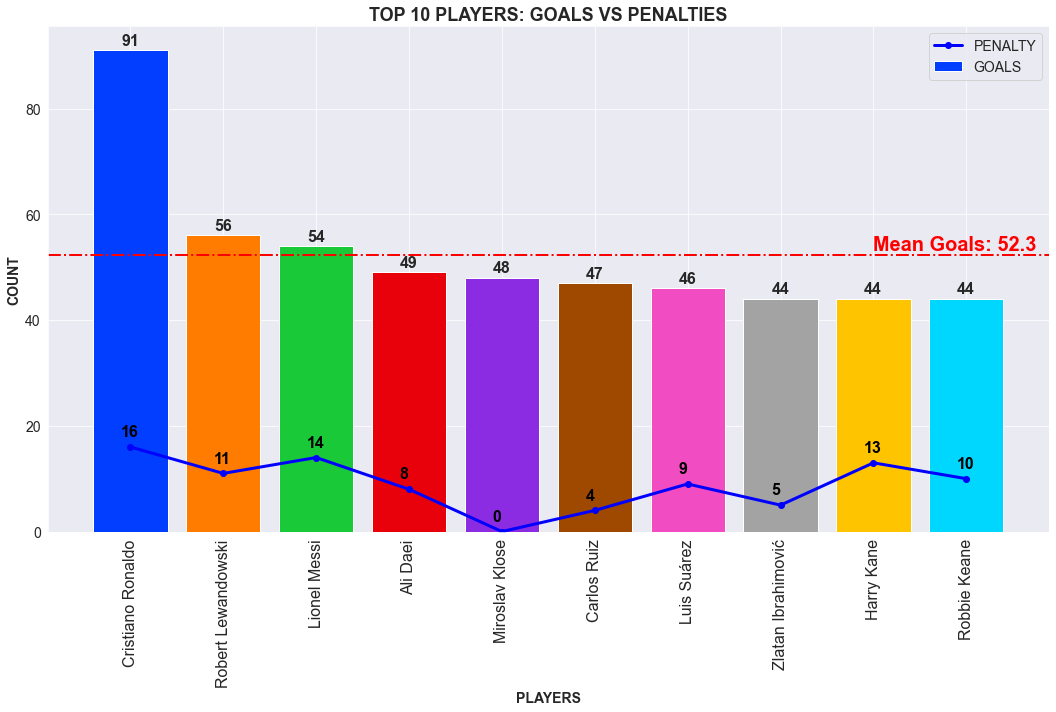

In [168]:
top_10_players = grouped_by_players.sort_values(by='total_goals', ascending=False).head(10)
top_10_players.reset_index()

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(top_10_players["scorer"], top_10_players["total_goals"], label="GOALS", color=sns.color_palette("bright",10))
ax.tick_params(axis="y", labelsize=14)
ax.plot(top_10_players["scorer"], top_10_players["penalty"], color="blue", marker="o", label="PENALTY", linewidth=3)

# Highlighting red dashdot line in Bar Chart showing Mean of top_10_players["total_goals"]
plt.axhline(top_10_players["total_goals"].mean(), color="red", linestyle="-.", linewidth="2")
plt.text(8, top_10_players["total_goals"].mean()+1, f'Mean Goals: {top_10_players["total_goals"].mean()}', fontsize=20, fontweight="bold", color="red")

for x,y in enumerate(top_10_players["total_goals"]):
    ax.text(x-0.1,y+1,str(y), fontsize=16, fontweight="bold")
for x,y in enumerate(top_10_players["penalty"]):
    ax.text(x-0.1,y+2,str(y), color="black", fontsize=16, fontweight="bold")

plt.legend(fontsize=14)
plt.xticks(rotation=90,fontsize=16)
plt.ylabel("COUNT", fontsize=14, fontweight="bold")
plt.xlabel("PLAYERS", fontsize=14, fontweight="bold")
plt.title("TOP 10 PLAYERS: GOALS VS PENALTIES", fontsize=18, fontweight="bold")
plt.show()

plt.tight_layout()
plt.savefig('figures/goal_vs_penalties.jpg')


# Heatmap Comparison Home_team who Wins and Away_team who Wins for Last 5 Years

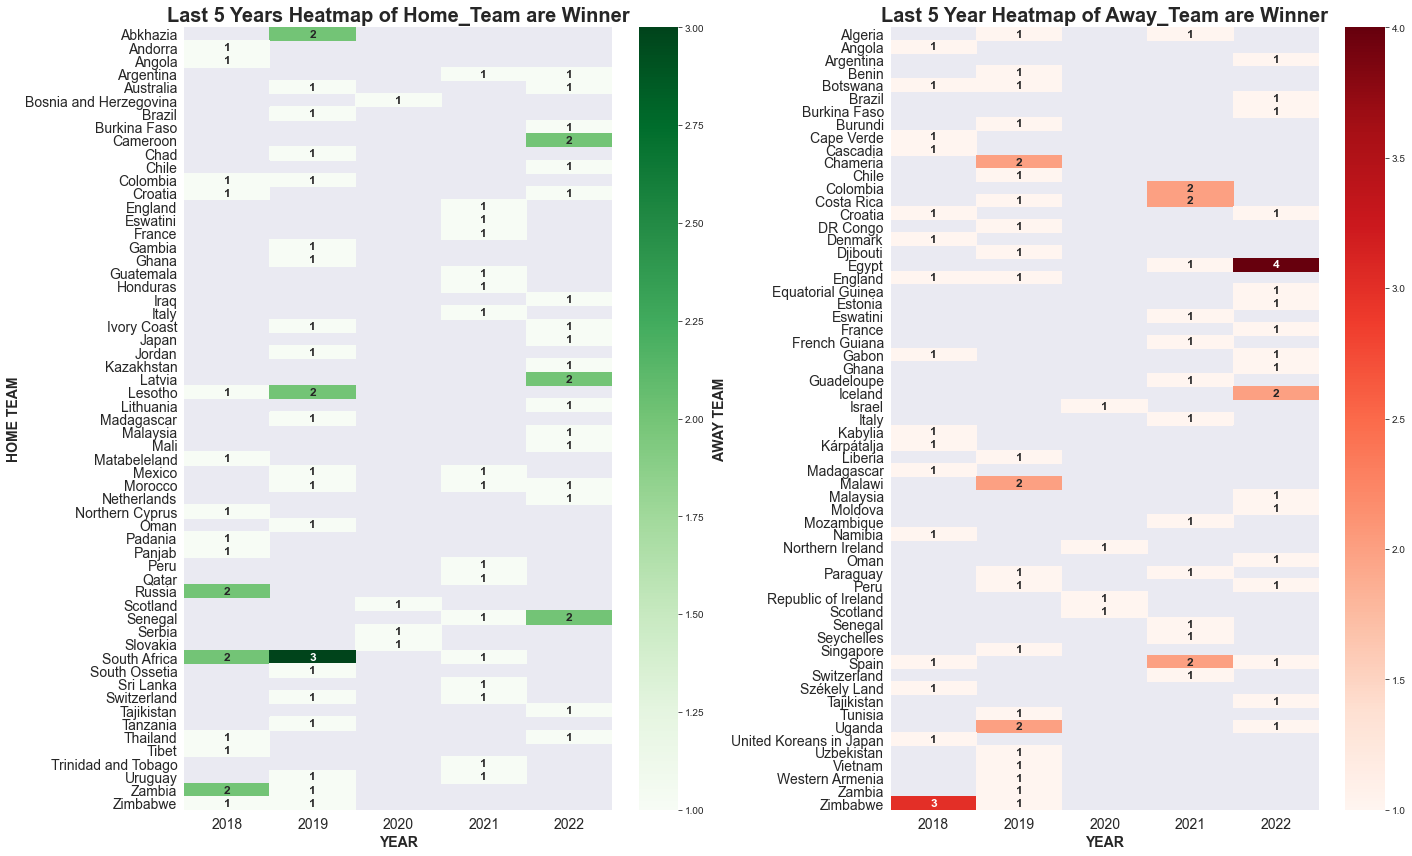

In [169]:
penalties["date"] = pd.to_datetime(penalties["date"])
penalties["year"] = penalties["date"].dt.year

list_last_5_years = penalties["year"].sort_values(ascending=True).unique()[-5:]
last_5_year_data = penalties[penalties["year"].isin(list_last_5_years)]

fig, hm_list = plt.subplots(ncols=2, figsize=(30,12))

heatmap1 = last_5_year_data.pivot_table(values="winner", index="home_team", columns="year", aggfunc="count")
sns.heatmap(data=heatmap1, ax=hm_list[0], cmap="Greens", annot=True, annot_kws={"fontsize":12, "fontweight":"bold"})
hm_list[0].set_xlabel("YEAR", fontsize=14, fontweight="bold")
hm_list[0].set_ylabel("HOME TEAM", fontsize=14, fontweight="bold")
hm_list[0].set_title("Last 5 Years Heatmap of Home_Team are Winner", fontsize=20, fontweight="bold")
hm_list[0].tick_params(axis="x", labelsize=14)
hm_list[0].tick_params(axis="y", labelsize=14)

heatmap2 = last_5_year_data.pivot_table(values="winner", index="away_team", columns="year", aggfunc="count")
sns.heatmap(data=heatmap2, ax=hm_list[1], cmap="Reds", annot=True, annot_kws={"fontsize":12, "fontweight":"bold"})
hm_list[1].set_xlabel("YEAR", fontsize=14, fontweight="bold")
hm_list[1].set_ylabel("AWAY TEAM", fontsize=14, fontweight="bold")
hm_list[1].set_title("Last 5 Year Heatmap of Away_Team are Winner", fontsize=20, fontweight="bold")
hm_list[1].tick_params(axis="x", labelsize=14)
hm_list[1].tick_params(axis="y", labelsize=14)

plt.tight_layout()
plt.savefig('figures/heatmap_home_team_VS_away_team_are_winner.jpg')